# Aprendizagem Automática - Student Sucess Uevora

- Teachers: Teresa Gonçalves, Luis Rato
- Made by: Miguel de Carvalho (43108), João Pereira(42864)

## Add necessary imports for our code

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from IPython.display import display
from sklearn import metrics

## Funcion that reads and parse our data

In [2]:
def data_treatment(file):
    data = pd.read_csv(file, header=0)
    if(file=='train.csv'):
        data.drop('Id',axis=1,inplace=True) 
        enconde = {"Program": {"Informatics": 0, "Nursing": 1, "Management": 2, "Biology": 3}}
        data = data.replace(enconde)
        y_data = data[['Failure']].copy()
        data.drop('Failure',axis=1,inplace=True)
        x_data = data.copy()
        return x_data,y_data
    else:
        save = data['Id'].copy()
        data.drop('Id',axis=1,inplace=True) 
        enconde = {"Program": {"Informatics": 0, "Nursing": 1, "Management": 2, "Biology": 3}}
        data = data.replace(enconde)
        return data,save

x_train,y_train = data_treatment('train.csv')
x_test,id_column = data_treatment('test.csv')

## Testing with different Models 

### GradientBoostingClassifier 

The first model we used was GradientBoosting

In [3]:
from sklearn.ensemble import GradientBoostingClassifier 

#### Choosing the best Parameters

We will test each parameter and try to get the best of each one

##### Parameter "learning_rate"

learning_rate shrinks the contribution of each tree by learning_rate.

learning_rate: 0.01, train_accuracy: 0.9198266522210184 ,test_accuracy: 0.9144153936545241
learning_rate: 0.11, train_accuracy: 0.9637053087757314 ,test_accuracy: 0.9447444183313749
learning_rate: 0.21000000000000002, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.9452849588719154
learning_rate: 0.31000000000000005, train_accuracy: 0.9821235102925244 ,test_accuracy: 0.9436574618096358
learning_rate: 0.41000000000000003, train_accuracy: 0.9886240520043337 ,test_accuracy: 0.9431139835487663
learning_rate: 0.51, train_accuracy: 0.9897074756229686 ,test_accuracy: 0.9425851938895417
learning_rate: 0.6100000000000001, train_accuracy: 0.985373781148429 ,test_accuracy: 0.9425881316098706
learning_rate: 0.7100000000000001, train_accuracy: 0.991332611050921 ,test_accuracy: 0.9414923619271447
learning_rate: 0.81, train_accuracy: 0.9929577464788732 ,test_accuracy: 0.9393272620446533
learning_rate: 0.91, train_accuracy: 0.9918743228602384 ,test_accuracy: 0.9186839012925969
learning_rate: 1.01

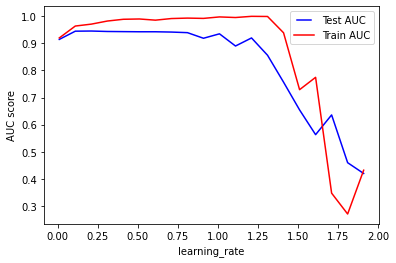

In [4]:
min_learning = 0.01
max_learning = 1
inc_learning = int((max_learning-min_learning)/10)
n_learning = np.arange(min_learning,max_learning+1,0.10)
vali_results = []
train_results = []

for learning in n_learning:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=learning, max_depth=3, min_samples_split=0.7, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"learning_rate: {learning}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_learning, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_learning, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('learning_rate')
plt.show()

##### Parameter "n_estimators"

n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

n_estimators: 1, train_accuracy: 0.7291440953412784 ,test_accuracy: 0.7291421856639249
n_estimators: 20, train_accuracy: 0.9274106175514626 ,test_accuracy: 0.9176615746180963
n_estimators: 39, train_accuracy: 0.9436619718309859 ,test_accuracy: 0.9322767332549942
n_estimators: 58, train_accuracy: 0.9507042253521126 ,test_accuracy: 0.9393301997649823
n_estimators: 77, train_accuracy: 0.9566630552546046 ,test_accuracy: 0.9431227967097533
n_estimators: 96, train_accuracy: 0.957204767063922 ,test_accuracy: 0.9431110458284371
n_estimators: 115, train_accuracy: 0.9631635969664138 ,test_accuracy: 0.9490804935370152
n_estimators: 134, train_accuracy: 0.9626218851570965 ,test_accuracy: 0.9458254994124559
n_estimators: 153, train_accuracy: 0.9642470205850487 ,test_accuracy: 0.9469124559341952
n_estimators: 172, train_accuracy: 0.9691224268689057 ,test_accuracy: 0.9485428907168038
n_estimators: 191, train_accuracy: 0.9702058504875406 ,test_accuracy: 0.9458254994124561


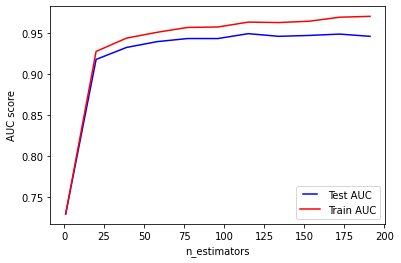

In [5]:
min_estimators = 1
max_estimators = 200
inc_estimators = int((max_estimators-min_estimators)/10)
n_estimators = range(min_estimators,max_estimators+1,inc_estimators)
vali_results = []
train_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator,learning_rate=0.11, max_depth=3, min_samples_split=0.7, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"n_estimators: {estimator}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_estimators, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('n_estimators')
plt.show()

##### Parameter "max_depth"

max_depth indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test errors.

max_depth: 1, train_accuracy: 0.9544962080173348 ,test_accuracy: 0.9425822561692128
max_depth: 2, train_accuracy: 0.9577464788732394 ,test_accuracy: 0.9479964747356051
max_depth: 3, train_accuracy: 0.9637053087757314 ,test_accuracy: 0.9463660399529965
max_depth: 4, train_accuracy: 0.9680390032502708 ,test_accuracy: 0.9458225616921269
max_depth: 5, train_accuracy: 0.9664138678223185 ,test_accuracy: 0.9474529964747356
max_depth: 6, train_accuracy: 0.9664138678223185 ,test_accuracy: 0.9485370152761456
max_depth: 7, train_accuracy: 0.9674972914409534 ,test_accuracy: 0.9469183313748533
max_depth: 8, train_accuracy: 0.9664138678223185 ,test_accuracy: 0.9474529964747358
max_depth: 9, train_accuracy: 0.9653304442036836 ,test_accuracy: 0.9479964747356051
max_depth: 10, train_accuracy: 0.9685807150595883 ,test_accuracy: 0.9474559341950647


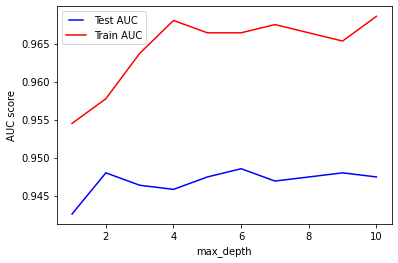

In [6]:
min_depth = 1
max_depth = 10
inc_depth = int((max_depth-min_depth)/10)
n_depth = np.arange(min_depth,max_depth+1,1)
vali_results = []
train_results = []

for depth in n_depth:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=float(depth), min_samples_split=0.7, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"max_depth: {depth}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_depth, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_depth, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('max_depth')
plt.show()

##### Parameter (min_samples_split)

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

min_samples_split: 0.1, train_accuracy: 0.9989165763813651 ,test_accuracy: 0.9425705052878965
min_samples_split: 0.2, train_accuracy: 0.9967497291440953 ,test_accuracy: 0.9436574618096356
min_samples_split: 0.30000000000000004, train_accuracy: 0.9918743228602384 ,test_accuracy: 0.9463719153936545
min_samples_split: 0.4, train_accuracy: 0.9859154929577465 ,test_accuracy: 0.9501674500587545
min_samples_split: 0.5, train_accuracy: 0.9745395449620802 ,test_accuracy: 0.9463631022326675
min_samples_split: 0.6, train_accuracy: 0.9685807150595883 ,test_accuracy: 0.9474500587544066
min_samples_split: 0.7000000000000001, train_accuracy: 0.9685807150595883 ,test_accuracy: 0.9490804935370154
min_samples_split: 0.8, train_accuracy: 0.9631635969664138 ,test_accuracy: 0.945828437132785
min_samples_split: 0.9, train_accuracy: 0.9544962080173348 ,test_accuracy: 0.9436574618096358
min_samples_split: 1.0, train_accuracy: 0.9561213434452871 ,test_accuracy: 0.9425793184488838


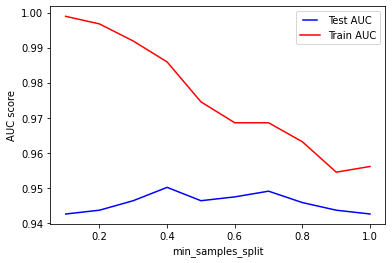

In [7]:
min_samples = 0.1
max_samples = 1.1
n_samples = np.arange(min_samples,max_samples,0.1)
vali_results = []
train_results = []

for samples in n_samples:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=8, min_samples_split=samples, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"min_samples_split: {samples}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_samples, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_samples, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('min_samples_split')
plt.show()

##### Parameters (min_samples_leaf)

min_samples_leaf is The minimum number of samples required to be at a leaf node. This similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs.

min_samples_leaf: 1, train_accuracy: 0.9739978331527628 ,test_accuracy: 0.9485428907168039
min_samples_leaf: 2, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.9452849588719154
min_samples_leaf: 3, train_accuracy: 0.9734561213434453 ,test_accuracy: 0.946909518213866
min_samples_leaf: 4, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9479905992949472
min_samples_leaf: 5, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9496180963572268
min_samples_leaf: 6, train_accuracy: 0.9712892741061755 ,test_accuracy: 0.9463660399529965
min_samples_leaf: 7, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.9474559341950647
min_samples_leaf: 8, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9452849588719154
min_samples_leaf: 9, train_accuracy: 0.9702058504875406 ,test_accuracy: 0.9474529964747356


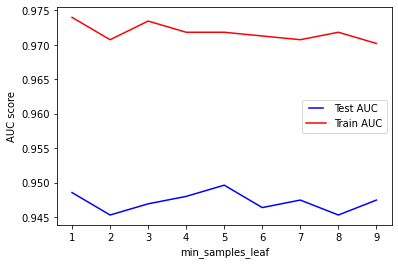

In [8]:
min_leaf = 1
max_leaf = 10
n_leafs = np.arange(min_leaf,max_leaf,1)
vali_results = []
train_results = []

for leaf in n_leafs:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=8, min_samples_split=0.6, min_samples_leaf=leaf, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"min_samples_leaf: {leaf}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_leafs, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_leafs, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('min_samples_leaf')
plt.show()

##### Parameters (max_features)

max_features represents the number of features to consider when looking for the best split.

max_features: 1, train_accuracy: 0.957204767063922 ,test_accuracy: 0.9452967097532315
max_features: 2, train_accuracy: 0.9647887323943662 ,test_accuracy: 0.9469242068155111
max_features: 3, train_accuracy: 0.9647887323943662 ,test_accuracy: 0.9452878965922444
max_features: 4, train_accuracy: 0.9653304442036836 ,test_accuracy: 0.9469183313748533
max_features: 5, train_accuracy: 0.9680390032502708 ,test_accuracy: 0.947996474735605
max_features: 6, train_accuracy: 0.9702058504875406 ,test_accuracy: 0.9463689776733256
max_features: 7, train_accuracy: 0.9723726977248104 ,test_accuracy: 0.9452849588719154
max_features: 8, train_accuracy: 0.9702058504875406 ,test_accuracy: 0.9496180963572268
max_features: 9, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.946906580493537


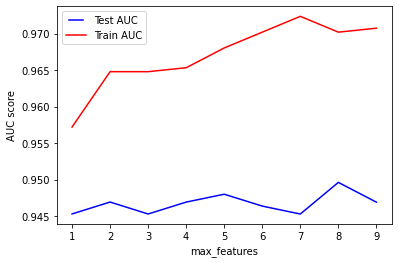

In [9]:
min_features = 1
max_features = 10
n_features = np.arange(min_features,max_features,1)
vali_results = []
train_results = []

for feature in n_features:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=8, min_samples_split=0.6, min_samples_leaf=7, max_features=feature)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"max_features: {feature}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_features, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_features, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('max_features')
plt.show()

#### Attempts and Results

| attempt/parameters 	| n_estimators 	| learning_rate 	| max_depth 	| min_samples_split 	| min_samples_leaf 	| max_features 	| **Accuracy** 	|
|:-:	|:-:	|:-:	|:-:	|:-:	|:-:	|:-:	|:-:	|
| 1 	| default 	| default 	| default 	| default 	| default 	| default 	| **0.93617** 	|
| 2 	| 39 	| 0.11 	| 3 	| 0.5 	| 1 	| 8 	| **0.94366** 	|
| 3 	| 138 	| 0.1 	| 8 	| 0.6 	| 7 	| 4 	| **0.92957** 	|

### Generate File Result

In [10]:
model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.01, max_depth=0.02, min_samples_split=0.6, min_samples_leaf=0.4, max_features=3)

model.fit(x_train, y_train.values.ravel())

result = model.predict(x_test)

result = pd.DataFrame(data=result)
result.columns = ['Failure']
result.insert(loc=0,column ='Id',value=id_column)

print(f"RESULT: {result}")

result.to_csv(r'result.csv', index = False)

RESULT:             Id  Failure
0    131394910        0
1    131391329        0
2    111345779        0
3    131382288        0
4    131379697        0
..         ...      ...
787  111345889        0
788  111354299        0
789  131389518        0
790  131384425        0
791  131391767        0

[792 rows x 2 columns]


### BaggingClassifier -> 95.0%

In [ ]:
from sklearn.ensemble import BaggingClassifier

clf = GridSearchCV(BaggingClassifier(), parameters_K,scoring='accuracy',refit=True,cv=2, n_jobs=-1)
clf.fit(x_train, y_train.values.ravel())

scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
print(scores.mean())

### KNeighborsClassifier -> 93.7%

In [12]:
from sklearn.neighbors import KNeighborsClassifier

parameters_K = {
    "n_neighbors":np.arange(1,500,50),
    "weights": ["uniform",  "distance"],
    "leaf_size": np.arange(1,1000,50)
    }

clf = GridSearchCV(KNeighborsClassifier(), parameters_K,scoring='accuracy',refit=True,cv=2, n_jobs=-1)
clf.fit(x_train, y_train.values.ravel())

scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
print(scores.mean())

0.9246827262044655


### LogisticRegression -> 95.8% (The best)

In [15]:
from sklearn.linear_model import LogisticRegression

parameters_L = {
    "C":np.arange(1,701,50),
    "penalty": ["l1","l2"],
    "solver": ["liblinear",],
    "tol": [1e-4],
    "max_iter": np.arange(1000,7001,1000),
    "intercept_scaling":np.arange(1,701,50),
    "multi_class":["auto"],
    }

clf = GridSearchCV(LogisticRegression(), parameters_L,scoring='accuracy',refit=True,cv=2, n_jobs=-1)
clf.fit(x_train, y_train.values.ravel())

scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
print(scores.mean())

0.9436603995299647


### Procedimentos

Na primeira parte do trabalho utilizamos o GradientBoostingClassifier
com parametros escolhidos por nós com base nas observações dos graficos (treino supervisionado).
Com este metodo obtivemos 2 modelos:

- GradientBoosting com parametros default -> 0.92957%)
- GradientBoosting com parametros escolhidos -> 0.94366%)

Na segunda parte do trabalho utilizamos a função GridSearchCV para escolher os melhores parametros (treino não supervisionado) para os seguintes modelos:

- BaggingClassifier (DecisionTrees) -> 95.0% (sem GridSearchCV)
- KNeighborsClassifier -> 93.7%
- LogisticRegression -> 95.8% (The best)

nota: o modelo BaggingClassifier (DecisionTrees) não obteve bons resultados ao utilizar GridSearchCV (portanto não incluimos no codigo)

O melhor modelo que conseguimos obter foi o LogisticRegression com 95.8% de "accuracy"

### Conclusão

Realizar este trabalho permitiu-nos ver o "potencial" dos algoritmos de machine-learning ao oferecer uma solução 
para um problema de dificil resposta (o aluno poderá desistir do curso?). Para que essa solução seja de confiança:

- É necessário intrepretar os dados do problema: agrupar e separar a informação util.

- Escolher o melhor algoritmo ou estrategia de apredizagem com base na analise feita aos dados: os dados influenciam 
a performance do algoritmo, podendo ou não favorecer este.

- Ajustar o modelo construido de forma a ter a melhor performace possivel: validar o modelo, permitindo encontrar os parametros adequados.

- Verificar se o modelo final permite resolver o problema. (Avaliar o modelo e encontrar erros ao nivel da interpretação dos dados e/ou construção do modelo final.